<a href="https://colab.research.google.com/github/Darrenn231/MachineLearning/blob/main/ML_BA05_LAB2_2502001763.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("dataset_lab2.xlsx")
df

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,y
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,M,fracture,74.0,164.0,No medication,49,0.7941
165,24140,50.285303,F,fracture,59.0,161.0,No medication,6,0.7971
166,6969,46.359721,M,fracture,67.0,169.0,No medication,10,0.8037
167,5505,54.788368,M,fracture,70.0,166.0,No medication,14,0.8072


1. Show which variable have missing data


In [ ]:
df.isna().sum()

id               0
age             33
sex              4
fracture         0
weight_kg        0
height_cm        0
medication       0
waiting_time     0
y                0
dtype: int64

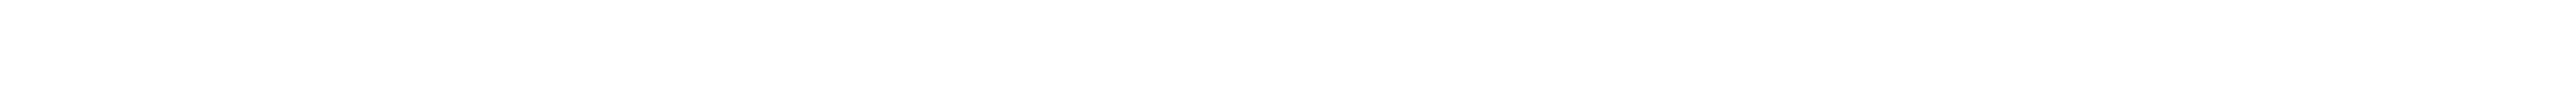

[Text(0.5, 1.0, "'y' Distribution of sex")]

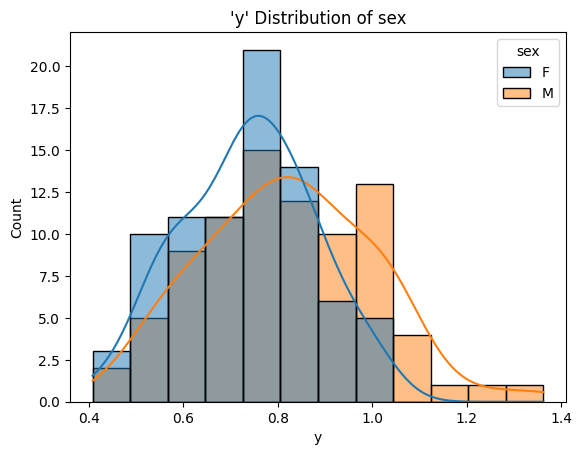

In [ ]:
sns.histplot(data = df, x = "y", hue = "sex", kde = True).set(title = "'y' Distribution for sex")

[Text(0.5, 1.0, "'y' Distribution for fracture/no fracture")]

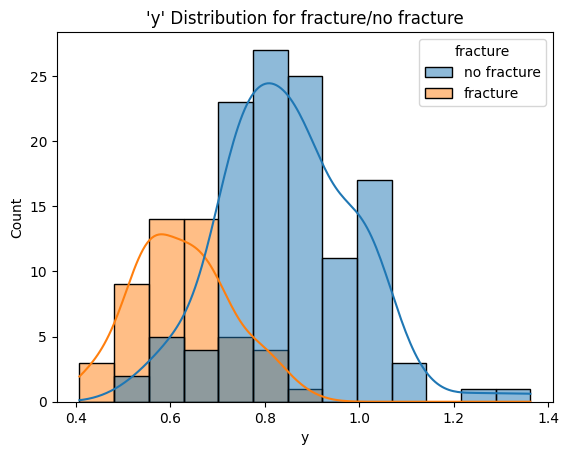

In [ ]:
sns.histplot(data = df, x = "y", hue = "fracture", kde = True).set(title = "'y' Distribution for fracture/no fracture")

[Text(0.5, 1.0, "'y' Distribution for medication")]

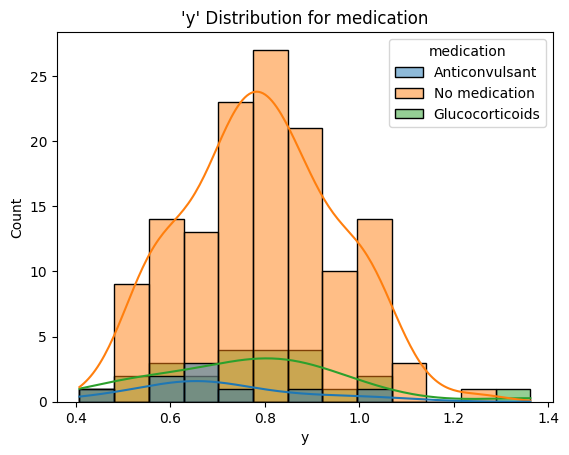

In [ ]:
sns.histplot(data = df, x = "y", hue = "medication", kde = True).set(title = "'y' Distribution for medication")

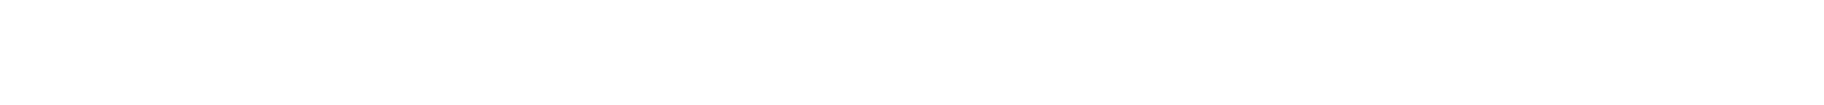

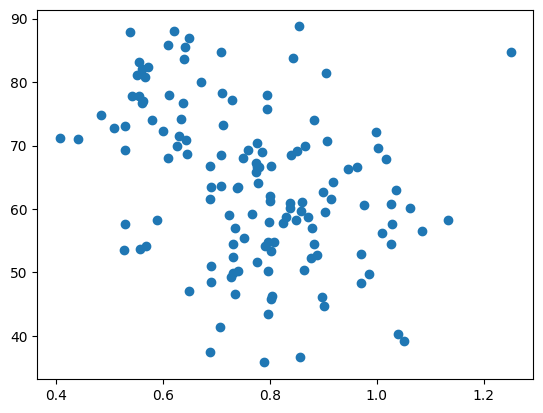

In [ ]:
plt.scatter(data = df, x = "y", y = "age")

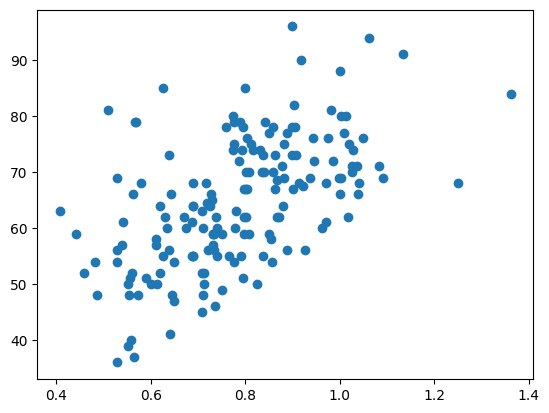

In [ ]:
plt.scatter(data = df, x = "y", y = "weight_kg")

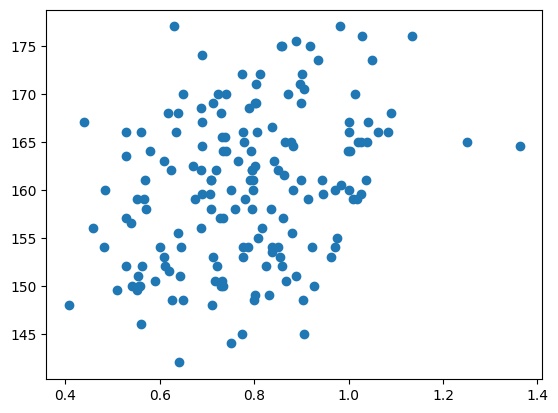

In [ ]:
plt.scatter(data = df, x = "y", y = "height_cm")

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df_clean = df[["age", "height_cm", "weight_kg"]].dropna()
df_wh = df_clean.drop(["age"], axis = 1)
df_age = df_clean[["age"]]

#Linear Regression'
lin_reg = LinearRegression()
lin_reg.fit(df_wh, df_age)
df_impute = pd.DataFrame(lin_reg.predict(df[['height_cm', 'weight_kg']]))
df_impute.rename({0 : 'age'}, axis = 1, inplace = True)
df_impute

,age
0,65.487203
1,62.768990
2,59.821836
3,68.306856
4,63.730458
...,...
164,62.149128
165,63.626212
166,60.521286
167,61.529265


In [ ]:
df_cleaned = df.copy()
df_cleaned.fillna(df_impute, inplace = True)
df_cleaned.isna().sum()

id              0
age             0
sex             4
fracture        0
weight_kg       0
height_cm       0
medication      0
waiting_time    0
y               0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df_cat_1 = df_cleaned[["sex", "fracture", "medication"]]
cat_encoder = OneHotEncoder()

df_cat_onehot = cat_encoder.fit_transform(df_cat_1)
df_cat_onehot

df_cat_onehot_df = pd.DataFrame(df_cat_onehot.toarray())
df_cat_onehot_df

df_temp = pd.concat([df_cleaned, df_cat_onehot_df], axis = 1)
df_temp = df_temp.drop(['sex','fracture', 'medication'], axis = 1)
df_eng = df_temp.copy()

df_eng

,id,age,weight_kg,height_cm,waiting_time,y,0,1,2,3,4,5,6,7
0,469,57.052768,64.0,155.5,18,0.8793,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,8724,75.741225,78.0,162.0,56,0.7946,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,6736,70.778900,73.0,170.5,10,0.9067,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,24180,78.247175,60.0,148.0,14,0.7112,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,17072,54.191877,55.0,161.0,20,0.7909,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,74.0,164.0,49,0.7941,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
165,24140,50.285303,59.0,161.0,6,0.7971,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
166,6969,46.359721,67.0,169.0,10,0.8037,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
167,5505,54.788368,70.0,166.0,14,0.8072,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df_clean1 = df_eng.copy()
df_clean1.drop(['id'], axis = 1, inplace = True)
df_clean1.isna().sum()

age             0
weight_kg       0
height_cm       0
waiting_time    0
y               0
0               0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(df_clean1.drop("y", axis = 1),df_clean1["y"],test_size = 0.4,random_state = 99)


print("All data: ", len(df_cleaned))
print("Training data:",  len(x_train))
print("Validation data:", len(x_validation))

All data:  169
Training data: 101
Validation data: 68


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(np.array(x_train), y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_val = lin_reg.predict(np.array(x_validation))
lin_reg_mse_val = mean_squared_error(y_validation, y_pred_val)
lin_reg_rmse_val = np.sqrt(lin_reg_mse_val)
lin_reg_r2_val = lin_reg.score(np.array(x_validation), y_validation)


print("MSE : ", lin_reg_mse_val)
print("RMSE : ", lin_reg_rmse_val)
print("R^2 : ", lin_reg_r2_val)

MSE :  0.009184693984112383
RMSE :  0.09583680912943827
R^2 :  0.6983619931702668


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures()
poly_x = poly_reg.fit_transform(x_train.values)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_x, y_train.values)

LinearRegression()

In [ ]:
poly_x_val = poly_reg.fit_transform(x_validation.values)
y_poly_pred_val = poly_reg_model.predict(poly_x_val)

poly_reg_mse_val = mean_squared_error(y_validation.values, y_poly_pred_val)
poly_reg_rmse_val = np.sqrt(poly_reg_mse_val)
poly_reg_r2_val = poly_reg_model.score(poly_x_val, y_validation.values)

print("MSE : ", poly_reg_mse_val)
print("RMSE : ", poly_reg_rmse_val)
print("R^2 : ", poly_reg_r2_val)

MSE :  0.04101965219899912
RMSE :  0.20253308914594453
R^2 :  -0.3471419027740992
